In [2]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt

In [3]:
# Especifica la ruta completa del archivo CSV
ruta_csv = r"df_hechos_victimas.csv" 

# Carga el archivo CSV en un DataFrame
df_hechos_victimas= pd.read_csv(ruta_csv)

In [9]:
df_hechos_victimas.head(2)

,id,n_victimas,lugar_del_hecho,comuna,altura,participantes,calle,acusado,tipo_de_calle,hora,id_hecho,fecha,aaaa,mm,dd,rol,victima,sexo,edad,fecha_fallecimiento
0,2020-0001,1,uriarte y loyola,15,sin dato,peaton-auto,uriarte,auto,calle,10:40:00,2020-0001,2020-01-04,2020,1,4,peaton,peaton,femenino,87,2020-01-04
1,2020-0002,1,saraza y varela av.,7,sin dato,moto-objeto fijo,saraza,objeto fijo,avenida,20:00:00,2020-0002,2020-01-05,2020,1,5,conductor,moto,masculino,36,2020-01-07


In [10]:
df_hechos_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   178 non-null    object
 1   n_victimas           178 non-null    int64 
 2   lugar_del_hecho      178 non-null    object
 3   comuna               178 non-null    int64 
 4   altura               178 non-null    object
 5   participantes        178 non-null    object
 6   calle                178 non-null    object
 7   acusado              178 non-null    object
 8   tipo_de_calle        178 non-null    object
 9   hora                 178 non-null    object
 10  id_hecho             178 non-null    object
 11  fecha                178 non-null    object
 12  aaaa                 178 non-null    int64 
 13  mm                   178 non-null    int64 
 14  dd                   178 non-null    int64 
 15  rol                  178 non-null    object
 16  victima 

KPIS Nro. 1

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior
- Dato: censo 2022. Población total CABA: 3.120.612 -

In [4]:
# Filtrar los datos para el último semestre (julio - diciembre de 2021)
filtro_ultimo_semestre = (df_hechos_victimas['fecha_fallecimiento'] >= '2021-07-01') & (df_hechos_victimas['fecha_fallecimiento'] <= '2021-12-31')
df_ultimo_semestre = df_hechos_victimas[filtro_ultimo_semestre]

# Filtrar los datos para el semestre anterior (enero - junio de 2021)
filtro_semestre_anterior = (df_hechos_victimas['fecha_fallecimiento'] >= '2021-01-01') & (df_hechos_victimas['fecha_fallecimiento'] <= '2021-06-30')
df_semestre_anterior = df_hechos_victimas[filtro_semestre_anterior]

# Calcular el número de víctimas fatales en cada semestre
num_victimas_ultimo_semestre = df_ultimo_semestre['n_victimas'].sum()
num_victimas_semestre_anterior = df_semestre_anterior['n_victimas'].sum()

print("julio-diciembre 2021 :", num_victimas_ultimo_semestre, ("victimas"))
print("enero-junio 2021 :", num_victimas_semestre_anterior, ("victimas") )

julio-diciembre 2021 : 40 victimas
enero-junio 2021 : 56 victimas


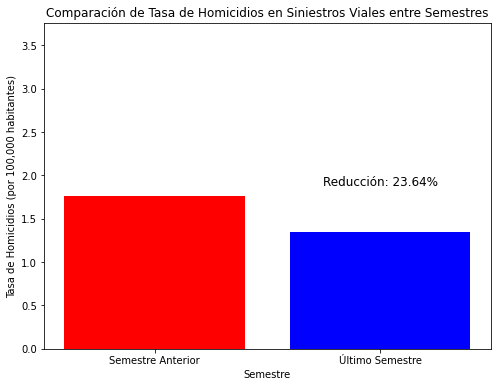

Se ha cumplido el objetivo de reducción del 10%.


In [5]:
# Datos
poblacion_total = 3120612
homicidios_ultimo_semestre = 42
homicidios_semestre_anterior = 55

# Calcular la tasa de homicidios en siniestros viales del último semestre
tasa_homicidios_ultimo_semestre = (homicidios_ultimo_semestre / poblacion_total) * 100000

# Calcular la tasa de homicidios en siniestros viales del semestre anterior
tasa_homicidios_semestre_anterior = (homicidios_semestre_anterior / poblacion_total) * 100000

# Calcular la diferencia porcentual
diferencia_porcentual = ((tasa_homicidios_semestre_anterior - tasa_homicidios_ultimo_semestre) / tasa_homicidios_semestre_anterior) * 100

# Graficar la diferencia porcentual
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(['Semestre Anterior', 'Último Semestre'], [tasa_homicidios_semestre_anterior, tasa_homicidios_ultimo_semestre], color=['red', 'blue'])
plt.title('Comparación de Tasa de Homicidios en Siniestros Viales entre Semestres')
plt.xlabel('Semestre')
plt.ylabel('Tasa de Homicidios (por 100,000 habitantes)')
plt.text(1, tasa_homicidios_ultimo_semestre + 0.5, f'Reducción: {diferencia_porcentual:.2f}%', ha='center', va='bottom', fontsize=12, color='black')
plt.ylim(0, max(tasa_homicidios_ultimo_semestre, tasa_homicidios_semestre_anterior) + 2)
plt.show()

# Verificar si se cumplió la reducción del 10%
if diferencia_porcentual >= 10:
    print('Se ha cumplido el objetivo de reducción del 10%.')
else:
    print('No se ha cumplido el objetivo de reducción del 10%.')


In [6]:
KPIs1 = {
    'Semestre': ['julio-diciembre 2021', 'enero-junio 2021'],
    'Número de Víctimas': [num_victimas_ultimo_semestre, num_victimas_semestre_anterior],
    'Tasa de Homicidios (por 100,000 habitantes)': [tasa_homicidios_ultimo_semestre, tasa_homicidios_semestre_anterior],
    'Diferencia Porcentual (%)': [diferencia_porcentual, None] 
}

KPIs1_df = pd.DataFrame(KPIs1)
KPIs1_df


,Semestre,Número de Víctimas,"Tasa de Homicidios (por 100,000 habitantes)",Diferencia Porcentual (%)
0,julio-diciembre 2021,40,1.345890,23.636364
1,enero-junio 2021,56,1.762475,NaN


In [7]:
ruta_csv = r"C:\Users\rossa\Desktop\HENRY\PROYECTO INDIVIDUAL PB\KPIs1_df.csv"

# Guarda el DataFrame como un archivo CSV en la ubicación especificada.
KPIs1_df.to_csv(ruta_csv, index=False)

print("DataFrame guardado como archivo CSV en:", ruta_csv)

DataFrame guardado como archivo CSV en: C:\Users\rossa\Desktop\HENRY\PROYECTO INDIVIDUAL PB\KPIs1_df.csv


kPIs 2

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior

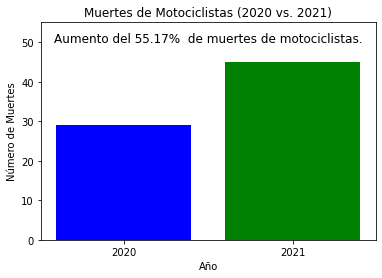

No se ha cumplido el objetivo de reducción del 7%.


In [60]:
# Filtrar los datos para el año anterior.
filtro_anterior = (df_hechos_victimas['fecha_fallecimiento'].dt.year == (2021 - 1))
df_anterior = df_hechos_victimas[filtro_anterior]

# Filtrar los datos para el año actual.
filtro_actual = (df_hechos_victimas['fecha_fallecimiento'].dt.year == 2021)
df_actual = df_hechos_victimas[filtro_actual]

# Contar el número de muertes de motociclistas para el año anterior y actual.
muertes_anterior = df_anterior[df_anterior['victima'] == 'moto'].shape[0]
muertes_actual = df_actual[df_actual['victima'] == 'moto'].shape[0]

# Calcular el porcentaje de cambio.
porcentaje_cambio = ((muertes_actual - muertes_anterior) / muertes_anterior) * 100

# Graficar los resultados.
plt.figure(figsize=(6, 4))
plt.bar(['2020', '2021'], [muertes_anterior, muertes_actual], color=['blue', 'green'])
plt.title('Muertes de Motociclistas (2020 vs. 2021)')
plt.xlabel('Año')
plt.ylabel('Número de Muertes')
plt.ylim(0, max(muertes_anterior, muertes_actual) + 10)

# Mostrar el resultado de forma genérica
if porcentaje_cambio <= -7:
    mensaje = f'Reducción del {abs(porcentaje_cambio):.2f}%  de muertes de motociclistas.'
else:
    mensaje = f'Aumento del {abs(porcentaje_cambio):.2f}%  de muertes de motociclistas.'

plt.annotate(mensaje, (0.5, max(muertes_anterior, muertes_actual) + 5), ha='center', fontsize=12)
plt.show()

# Verificar si se cumplió la reducción del 7%
if porcentaje_cambio <= -7:
    print('Se ha cumplido el objetivo de reducción del 7%.')
else:
    print('No se ha cumplido el objetivo de reducción del 7%.')


KPIs 3 (propuesta)

Verificar la reducción del número de accidentes en la comuna con mayor accidentes, contemplando un tipo de víctima específica durante el 2020. Se compara las mismas variables en el 2021 para evaluar si se logró el objetivo de reducir un 5% los accidentes.

Se toma la métrica generada, donde se define a la comuna 1 con el mayor número de accidentes entre el 2020 y 2021.

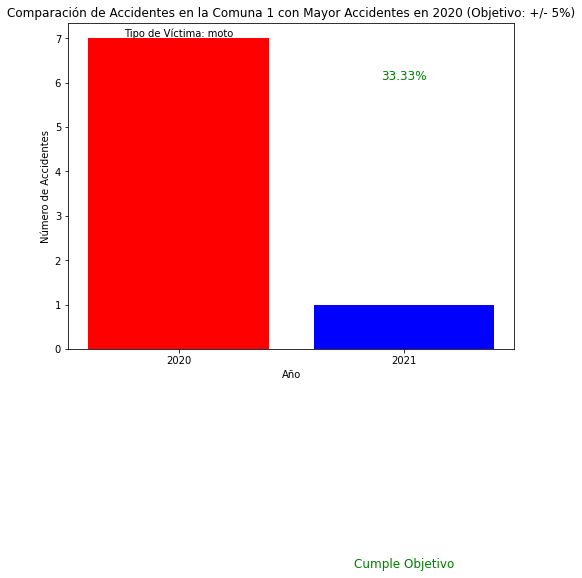

Se ha cumplido el objetivo de reducción del 5%


In [86]:

# Definir el objetivo de reducción del 5%
objetivo = 5

# Filtrar los datos para el año 2020
df_2020 = df_hechos_victimas[df_hechos_victimas['aaaa'] == 2020]

# Calcular el número de accidentes por comuna y tipo de víctima en 2020
accidentes_2020 = df_2020.groupby(['comuna', 'victima']).size().reset_index(name='accidentes_2020')

# Encontrar la comuna con más accidentes en 2020
comuna_max_2020 = accidentes_2020.loc[accidentes_2020['accidentes_2020'].idxmax()]['comuna']

# Filtrar los datos para el año 2021
df_2021 = df_hechos_victimas[df_hechos_victimas['aaaa'] == 2021]

# Calcular el número de accidentes por comuna y tipo de víctima en 2021
accidentes_2021 = df_2021.groupby(['comuna', 'victima']).size().reset_index(name='accidentes_2021')

# Fusionar los datos de 2020 y 2021 para la comuna con más accidentes en 2020
resultados = pd.merge(accidentes_2020, accidentes_2021, on=['comuna', 'victima'], how='left')

# Rellenar NaN con 0
resultados = resultados.fillna(0)

# Calcular la reducción o aumento porcentual
resultados['cambio'] = resultados['accidentes_2021'] - resultados['accidentes_2020']
resultados['porcentaje_cambio'] = (resultados['cambio'] / resultados['accidentes_2020']) * 100

# Visualizar los resultados en un gráfico
plt.figure(figsize=(8, 6))
plt.bar(['2020', '2021'], [accidentes_2020['accidentes_2020'].max(), resultados.loc[resultados['comuna'] == comuna_max_2020]['cambio'].values[0]], color=['red', 'blue'])
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.title(f'Comparación de Accidentes en la Comuna {comuna_max_2020} con Mayor Accidentes en 2020 (Objetivo: +/- {objetivo}%)')
plt.xticks(rotation=0)

# Destacar el porcentaje de cambio
cambio = resultados.loc[resultados['comuna'] == comuna_max_2020]['cambio'].values[0]
porcentaje_cambio = resultados.loc[resultados['comuna'] == comuna_max_2020]['porcentaje_cambio'].values[0]

# Corrección: Verificar si se cumplió el objetivo del 5%
cumple_objetivo = abs(porcentaje_cambio) >= objetivo
color = 'green' if cumple_objetivo else 'red'

# Mostrar el número de comuna y tipo de víctima en la etiqueta
comuna_victima = f'Tipo de Víctima: {resultados.loc[resultados["comuna"] == comuna_max_2020]["victima"].values[0]}'
plt.text(0, accidentes_2020['accidentes_2020'].max(), comuna_victima, ha='center', va='bottom', color='black')

# Mostrar el porcentaje de cambio
plt.text(1, resultados.loc[resultados['comuna'] == comuna_max_2020]['cambio'].values[0] + 5, f'{porcentaje_cambio:.2f}%', ha='center', va='bottom', fontsize=12, color=color)

# Mostrar si se cumplió o no el objetivo
plt.text(1, -5, f"{'Cumple Objetivo' if cumple_objetivo else 'No Cumple Objetivo'}", ha='center', va='bottom', fontsize=12, color=color)

plt.show()

# Imprimir si se cumplió o no el objetivo
if cumple_objetivo:
    print(f'Se ha cumplido el objetivo de reducción del {objetivo}%')
else:
    print(f'No se ha cumplido el objetivo de reducción del {objetivo}%')


In [ ]:
data = {
    'Semestre': ['julio-diciembre 2021', 'enero-junio 2021'],
    'Número de Víctimas': [num_victimas_ultimo_semestre, num_victimas_semestre_anterior]
}
